<a href="https://colab.research.google.com/github/amila-thushantha/sentiment_analysis_project/blob/main/Copy_of_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('/content/sentiment_analysis.csv')

In [4]:
data.head()


,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


DATA PREPROSECCING


In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

,0
id,0
label,0
tweet,0


TEXT PREPROCESSING


1)convert upercase lowercase


In [8]:
import re
import string

In [9]:
data["tweet"].head(5)

,tweet
0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,Finally a transparant silicon case ^^ Thanks t...
2,We love this! Would you go? #talk #makememorie...
3,I'm wired I know I'm George I was made that wa...
4,What amazing service! Apple won't even talk to...


In [10]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [11]:
data["tweet"].head(5)

,tweet
0,#fingerprint #pregnancy test https://goo.gl/h1...
1,finally a transparant silicon case ^^ thanks t...
2,we love this! would you go? #talk #makememorie...
3,i'm wired i know i'm george i was made that wa...
4,what amazing service! apple won't even talk to...


1)remove links

In [12]:
data["tweet"]=data["tweet"].apply(lambda x:" " .join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE)for x in x.split()))

In [13]:
data["tweet"].head(5)

,tweet
0,#fingerprint #pregnancy test #android #apps #...
1,finally a transparant silicon case ^^ thanks t...
2,we love this! would you go? #talk #makememorie...
3,i'm wired i know i'm george i was made that wa...
4,what amazing service! apple won't even talk to...


remove functuations

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuations(text):
  for punctuation in string.punctuation:
    text=text.replace(punctuation,'')
  return text

In [16]:
data["tweet"]=data["tweet"].apply(remove_punctuations)

In [17]:
data["tweet"].head(5)

,tweet
0,fingerprint pregnancy test android apps beaut...
1,finally a transparant silicon case thanks to ...
2,we love this would you go talk makememories un...
3,im wired i know im george i was made that way ...
4,what amazing service apple wont even talk to m...


remove numbers

In [18]:
data["tweet"].tail(90)

,tweet
7830,dropped my ipod on tile it cracked the screen...
7831,applewatch changed form 56 weeks to 23 weeks i...
7832,jetski with go pro enjoy iger iphone gopro la...
7833,morning click in photography there is a realit...
7834,using new macbookpro for last 3 days battery ...
...,...
7915,live out loud lol liveoutloud selfie smile son...
7916,we would like to wish you an amazing day make ...
7917,helping my lovely 90 year old neighbor with he...
7918,finally got my smart pocket wifi stay connecte...


In [19]:
data["tweet"]=data["tweet"].str.replace('\d+', '',regex=True)

In [20]:
data["tweet"].tail(90)

,tweet
7830,dropped my ipod on tile it cracked the screen...
7831,applewatch changed form weeks to weeks itll ...
7832,jetski with go pro enjoy iger iphone gopro la...
7833,morning click in photography there is a realit...
7834,using new macbookpro for last days battery b...
...,...
7915,live out loud lol liveoutloud selfie smile son...
7916,we would like to wish you an amazing day make ...
7917,helping my lovely year old neighbor with her ...
7918,finally got my smart pocket wifi stay connecte...


remove stop words(i,am,is)

In [21]:
import nltk

In [22]:
nltk.download('stopwords',download_dir='/content/static/modle')

[nltk_data] Downloading package stopwords to /content/static/modle...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
with open('/content/static/modle/corpora/stopwords/english','r') as file:
  sw=file.read().splitlines()


In [24]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [26]:
data["tweet"].head()

,tweet
0,fingerprint pregnancy test android apps beauti...
1,finally transparant silicon case thanks uncle ...
2,love would go talk makememories unplug relax i...
3,im wired know im george made way iphone cute d...
4,amazing service apple wont even talk question ...


stemming(base word finally = final)

In [27]:
from nltk.stem import PorterStemmer

In [28]:
ps=PorterStemmer()

In [29]:
data["tweet"]=data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [30]:
data["tweet"].head()

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love would go talk makememori unplug relax iph...
3,im wire know im georg made way iphon cute dave...
4,amaz servic appl wont even talk question unles...


In [31]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [32]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1EWAoOu6xYLpPHz-N6j0K7ObjeCnLkUbFVsFbyGshbn0#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


BUILDING VOCABULARY

In [33]:
from collections import Counter

In [34]:
vocab=Counter()

In [35]:
vocab.update(['java','python','python','c++'])

In [36]:
vocab

Counter({'java': 1, 'python': 2, 'c++': 1})

In [37]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [38]:
data['tweet']

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love would go talk makememori unplug relax iph...
3,im wire know im georg made way iphon cute dave...
4,amaz servic appl wont even talk question unles...
...,...
7915,live loud lol liveoutloud selfi smile soni mus...
7916,would like wish amaz day make everi minut coun...
7917,help love year old neighbor ipad morn made rea...
7918,final got smart pocket wifi stay connect anyti...


In [39]:
for sentence in data['tweet']:
  print(sentence)

Streaming output truncated to the last 5000 lines.
love eryka badu men crazi iphon galaxi instamood kiss instalove…
ipod stupid im stuck wait restor happen
follow capetownsup instagram sup surf fun capetown funni sexi samsung pictwittercomkxzvbuhqoi
cant believ restor phone cant back sopiss
luxuri breathabl much zeta suppli click link … iphon discount case
appl applemus overli complic unreli self indulg wrap expens wrapper typic appl
rooney rhyme e ye je mi ne click rhyme iphon
guess tmobilestillsuck tt soonfail iphon ever
updat got rid photo camera roll appl
gain follow rt must follow follow back follow everyon rt gain iphon sougofollow åb
didnt get io reason im sure get io appl
sun make freckl start come regularli bali travelgram freckl sunday selfi sundayselfi iphonex pictwittercomktjyhifz
cooki iphon cover cool girl buy phonecas twogudpictwittercomlsinpgzp
jasonvanwyk went get samsung day advis
sheer annoy see appear attempt facetim appl meh
phone stuck like day tho handsomerandi d

In [40]:
for sentence in data['tweet']:
  vocab.update(sentence.split())

In [41]:
vocab

Counter({'java': 5,
         'python': 2,
         'c++': 1,
         'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
 

In [42]:
len(vocab)

15951

In [43]:
data.shape

(7920, 3)

In [44]:
tokens=[key for key in vocab if vocab[key]>10]

In [45]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [46]:
len(tokens)

1145

In [47]:
def save_vocabulary(lines,filename):
  data='\n'.join(lines)
  file=open(filename,'w',encoding='utf-8')
  file.write(data)
  file.close()

save_vocabulary(tokens,'/content/static/modle/vocabulary.txt')

transform words to numerycal

divide dataset to train and test

In [48]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [49]:
x=data['tweet']
y=data['label']

In [50]:
x

,tweet
0,fingerprint pregnanc test android app beauti c...
1,final transpar silicon case thank uncl yay son...
2,love would go talk makememori unplug relax iph...
3,im wire know im georg made way iphon cute dave...
4,amaz servic appl wont even talk question unles...
...,...
7915,live loud lol liveoutloud selfi smile soni mus...
7916,would like wish amaz day make everi minut coun...
7917,help love year old neighbor ipad morn made rea...
7918,final got smart pocket wifi stay connect anyti...


In [51]:
y

,label
0,0
1,0
2,0
3,0
4,1
...,...
7915,0
7916,0
7917,0
7918,0


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [53]:
x_train.shape

(6336,)

In [54]:
x_test.shape

(1584,)

convert numerical value(VACTERIZATION)

In [55]:
x_train

,tweet
1259,photo new jordan instap life samsung may sprin...
7612,love new android updat sonyxperia smooth soni ...
7855,continu learn java appl hurt foot much
4532,taken xperiac selfi moment u xperia myxperia x...
4091,ive iphon charger past month one got week ago ...
...,...
5443,happi smile lol peac red short iphon lalala baii
679,fall beauti delici appl crispi healthi strong ...
3567,omg hahahaha got samsung thank babe 󾠣󾬓 󾬖 󾬔 com...
3108,gift yipe smile enjoy havefun even friday tgif...


In [56]:
y_train

,label
1259,0
7612,0
7855,1
4532,0
4091,1
...,...
5443,0
679,0
3567,0
3108,0


In [57]:
def vectorizer(ds,vocabulary):
  vectorized_list=[]
  for sentence in ds:
    sentence_lst=np.zeros(len(vocabulary))
    for i in range(len(vocabulary)):
      if vocabulary[i] in sentence.split():
        sentence_lst[i]=1
    vectorized_list.append(sentence_lst)
  vectorized_lst_new=np.array(vectorized_list,dtype=np.float32)
  return vectorized_lst_new




In [58]:
vectorize_x_train=vectorizer(x_train,tokens)

In [59]:
vectorize_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [60]:
for i in vectorize_x_train[0]:
  print(i)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [61]:
vectorized_x_test=vectorizer(x_test,tokens)

In [62]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [63]:
y_train.value_counts()

,count
label,
0,4703
1,1633


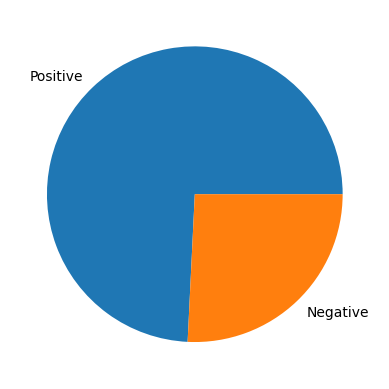

In [64]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

handle inbalance dataset

In [65]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorize_x_train_smote,y_train_smote=smote.fit_resample(vectorize_x_train,y_train)
print(vectorize_x_train_smote.shape,y_train_smote.shape)

(9406, 1145) (9406,)


In [66]:
y_train_smote.value_counts()

,count
label,
0,4703
1,4703


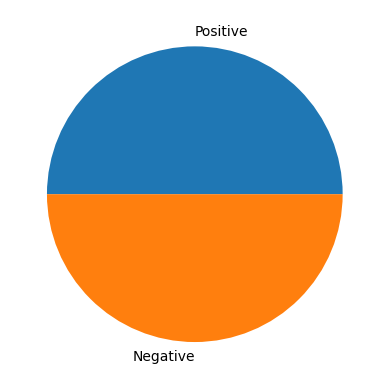

In [67]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

In [68]:
vectorize_x_train_smote

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37321195, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [69]:
y_train_smote

,label
0,0
1,0
2,1
3,0
4,1
...,...
9401,1
9402,1
9403,1
9404,1


In [70]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
y_test

,label
7567,1
6723,1
5696,0
184,1
813,0
...,...
5496,1
3381,1
3254,0
2249,0


modle train ekakat sudusu thathweta hadan ahawarai

MODLE TRAING AND EVALUATION

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [73]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act,y_pred):
  acc=round(accuracy_score(y_act,y_pred), 3)
  pr=round(precision_score(y_act,y_pred), 3)
  rec=round(recall_score(y_act,y_pred), 3)
  f1=round(f1_score(y_act,y_pred), 3)
  print(f'Training Score:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1-Score={f1}')

def validation_scores(y_act,y_pred):
  acc=round(accuracy_score(y_act,y_pred), 3)
  pr=round(precision_score(y_act,y_pred), 3)
  rec=round(recall_score(y_act,y_pred), 3)
  f1=round(f1_score(y_act,y_pred), 3)
  print(f'Testing Score:\n\tAccuracy={acc}\n\tPrecision={pr}\n\tRecall={rec}\n\tF1-Score={f1}')



logistic regression

In [74]:
# Fit the model
lr = LogisticRegression()
lr.fit(vectorize_x_train_smote, y_train_smote)

# Generate predictions
y_train_pred = lr.predict(vectorize_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)


# Call the function correctly
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)


Training Score:
	Accuracy=0.94
	Precision=0.915
	Recall=0.97
	F1-Score=0.942
Testing Score:
	Accuracy=0.863
	Precision=0.683
	Recall=0.837
	F1-Score=0.752


naive base

In [75]:
# Fit the model
mnb = MultinomialNB()
mnb.fit(vectorize_x_train_smote, y_train_smote)

# Generate predictions
y_train_pred = mnb.predict(vectorize_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)


# Call the function correctly
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy=0.909
	Precision=0.873
	Recall=0.959
	F1-Score=0.914
Testing Score:
	Accuracy=0.863
	Precision=0.664
	Recall=0.906
	F1-Score=0.766


decision tree

In [76]:
# Fit the model
dt = DecisionTreeClassifier()
dt.fit(vectorize_x_train_smote, y_train_smote)

# Generate predictions
y_train_pred = dt.predict(vectorize_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)


# Call the function correctly
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy=1.0
	Precision=1.0
	Recall=0.999
	F1-Score=1.0
Testing Score:
	Accuracy=0.828
	Precision=0.655
	Recall=0.644
	F1-Score=0.65


random forest

In [77]:
rf=RandomForestClassifier()
rf.fit(vectorize_x_train_smote, y_train_smote)

# Generate predictions
y_train_pred = rf.predict(vectorize_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)


# Call the function correctly
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy=1.0
	Precision=1.0
	Recall=1.0
	F1-Score=1.0
Testing Score:
	Accuracy=0.867
	Precision=0.739
	Recall=0.715
	F1-Score=0.727


support vector machine

In [78]:
svm=SVC()
svm.fit(vectorize_x_train_smote, y_train_smote)

# Generate predictions
y_train_pred = svm.predict(vectorize_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)


# Call the function correctly
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test,y_test_pred)

Training Score:
	Accuracy=0.977
	Precision=0.96
	Recall=0.995
	F1-Score=0.977
Testing Score:
	Accuracy=0.872
	Precision=0.715
	Recall=0.809
	F1-Score=0.759


In [79]:
import pickle
with open('/content/static/modle/model.pkl','wb') as file:
  pickle.dump(lr,file)

prediction pipline

In [168]:
import numpy as np
import pandas as pd
import re
import string

In [169]:

def remove_punctuations(text):
  for punctuation in string.punctuation:
    text=text.replace(punctuation,'')
  return text

In [170]:
with open('/content/static/modle/model.pkl','rb') as f:
  model=pickle.load(f)

In [171]:
with open('/content/static/modle/corpora/stopwords/english','r') as file:
  sw=file.read().splitlines()

In [172]:
vocab=pd.read_csv('/content/static/modle/vocabulary.txt',header=None)
tokens=vocab[0].tolist()

In [173]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [174]:

def preprocessing(text):
  data=pd.DataFrame([text],columns=['tweet'])
  data["tweet"]=data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
  data["tweet"]=data["tweet"].apply(lambda x:" " .join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE)for x in x.split()))
  data["tweet"]=data["tweet"].apply(remove_punctuations)
  data["tweet"]=data["tweet"].str.replace('\d+', '',regex=True)
  data["tweet"]=data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
  data["tweet"]=data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))
  return data["tweet"]


In [175]:
def vectorizer(ds,vocabulary):
  vectorized_list=[]
  for sentence in ds:
    sentence_lst=np.zeros(len(vocabulary))
    for i in range(len(vocabulary)):
      if vocabulary[i] in sentence.split():
        sentence_lst[i]=1
    vectorized_list.append(sentence_lst)
  vectorized_lst_new=np.array(vectorized_list,dtype=np.float32)
  return vectorized_lst_new

In [176]:
def get_prediction(vectorized_txt):
  prediction=model.predict(vectorized_txt)
  if prediction==1:
    return 'negative'
  else:
    return 'positive'


In [204]:
txt="i am very happy aboy this product"
preprocessed_txt=preprocessing(txt)
vectorized_txt=vectorizer(preprocessed_txt,tokens)
prediction=get_prediction(vectorized_txt)
prediction

'positive'